# Softmax

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [151]:
def predict(x, w):
    return (np.dot(x,w))

In [152]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

In [153]:
def label_predictions(vect_inputs):
    return vect_inputs.argmax(axis=1)

In [154]:
def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

In [155]:
def cost(output, y_target):
    return np.mean(cross_entropy(output, y_target))

In [156]:
def optimizar(x_train, smax, y_enc):
    return - np.dot(x_train.T, (y_enc - smax))

In [157]:
iris = datasets.load_iris()

In [158]:
x = iris["data"][::]
y = (iris["target"]).astype(np.int32).reshape(len(iris['target']),1)

In [159]:
for i in range(x.shape[1]):
    mean = x[:,i].mean()
    deviation =  x[:,i].std()
    x[:,i] = (x[:,i] - mean) / deviation

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [161]:
x_train = np.c_[np.ones((len(x_train),1)), x_train]
x_test = np.c_[np.ones((len(x_test),1)), x_test]

In [162]:
x_train.shape[1]

5

In [163]:
x_train[:10], x_test[:10]

(array([[ 1.00000000e+00, -4.16009689e-01, -1.74335684e+00,
          1.37546573e-01,  1.32509732e-01],
        [ 1.00000000e+00, -1.74885626e+00,  3.28414053e-01,
         -1.39706395e+00, -1.31544430e+00],
        [ 1.00000000e+00,  1.40150837e+00,  3.28414053e-01,
          5.35408562e-01,  2.64141916e-01],
        [ 1.00000000e+00, -9.00681170e-01,  1.70959465e+00,
         -1.28338910e+00, -1.18381211e+00],
        [ 1.00000000e+00, -5.25060772e-02, -8.22569778e-01,
          8.07091462e-02,  8.77547895e-04],
        [ 1.00000000e+00, -5.25060772e-02,  2.16998818e+00,
         -1.45390138e+00, -1.31544430e+00],
        [ 1.00000000e+00,  1.64384411e+00,  1.24920112e+00,
          1.33113254e+00,  1.71209594e+00],
        [ 1.00000000e+00, -1.50652052e+00,  7.88807586e-01,
         -1.34022653e+00, -1.18381211e+00],
        [ 1.00000000e+00,  5.53333275e-01,  5.58610819e-01,
          1.27429511e+00,  1.71209594e+00],
        [ 1.00000000e+00, -1.02184904e+00,  7.88807586e-01,
    

In [164]:
y_train[:10], y_test[:10]

(array([[1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [2],
        [0],
        [2],
        [0]]),
 array([[2],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [2]]))

In [165]:
y_enc = (np.arange(np.max(y_train.flatten()) + 1) == y_train.flatten()[:, None]).astype(float)

y_enc[:10]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [166]:
x_train.shape

(112, 5)

In [167]:
theta_set = np.random.rand(1,x_train.shape[1])
theta_ver = np.random.rand(1,x_train.shape[1])    
theta_vir = np.random.rand(1,x_train.shape[1])
theta_all = np.concatenate((theta_set,theta_ver,theta_vir)).reshape(x_train.shape[1],3)


eta = 0.001
max_iter = 20000
cost_smax = []
for i in range(0, max_iter):
    vector_pos_train = predict(x_train, theta_all)
    
    smax = softmax(vector_pos_train)
    theta_all =  theta_all - eta*(optimizar(x_train, smax, y_enc))
    J_cost = cost(smax, y_enc)
    cost_smax.append(J_cost)

theta_all

array([[-0.09431337,  5.71867915, -5.01504361],
       [-1.58912527,  3.12641166,  0.86743723],
       [ 2.92958891, -0.17023578, -1.6772028 ],
       [-4.49714097, -2.13218707,  8.46544117],
       [-4.2781798 , -1.07282842,  6.46995888]])

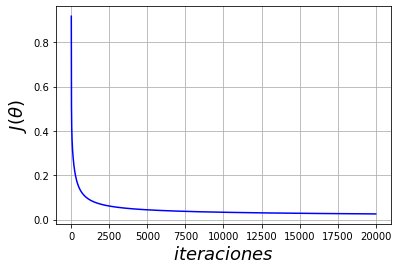

In [168]:
plt.plot(np.arange(max_iter), cost_smax, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [169]:
vector_pos_test = predict(x_test, theta_all)
    
smax_pred = softmax(vector_pos_test)
y_pred = label_predictions(smax_pred)

In [170]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 16,  2],
       [ 0,  0, 12]], dtype=int64)

In [171]:
actual = 0
total = 0

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            actual = cm[i][j] + actual
        total = cm[i][j] + total
actual / total

0.9473684210526315

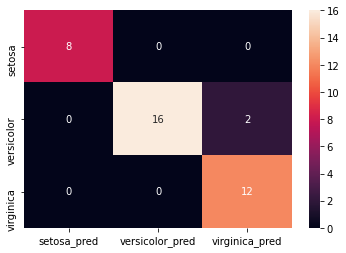

In [172]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
f = sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [173]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [174]:
print(classification_report(y_test,  y_pred, target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.89      0.94        18
   virginica       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.95      0.95      0.95        38

